In [1]:
import os
os.chdir(r"C:\Users\pc\Desktop\har-ml")  # Raw string
print(os.getcwd())  # Confirm the path change


C:\Users\pc\Desktop\har-ml


In [2]:
import os
print(os.listdir("notebooks"))

['data_analysis.ipynb', 'model_training-checkpoint.ipynb', 'model_training.ipynb']


In [3]:
import pandas as pd

# Load the processed dataset
file_path = "data/UCI_preprocessed.csv"  # Ensure this is the correct path
uci_df = pd.read_csv(file_path)

print("Dataset loaded successfully.")



Dataset loaded successfully.


In [4]:
import os
import pandas as pd
file_path = r"C:\Users\pc\Desktop\har-ml\data\UCI_preprocessed.csv"
uci_df = pd.read_csv(file_path)


if os.path.exists(file_path):
    print("File found. Loading dataset...")
    uci_df = pd.read_csv(file_path)
    print("Dataset loaded successfully.")
else:
    print("Error: File not found at", file_path)


File found. Loading dataset...
Dataset loaded successfully.


In [23]:
import pandas as pd

# Step 0: Load your dataset
df = pd.read_csv('data/UCI_preprocessed.csv')  # replace with your actual file name

# Step 1: Separate features and target
# Let's assume the target column is named 'Activity' and the rest are features
X = df.drop('Activity', axis=1)
y = df['Activity']


In [25]:
import pandas as pd

# Step 0: Try loading your dataset
try:
    df = pd.read_csv('data/UCI_preprocessed.csv')  # Replace with your actual filename
    print("✅ Dataset loaded successfully!")
    print("📋 Columns in the dataset:")
    print(df.columns)
    print("\n🔍 First few rows:")
    print(df.head())
except FileNotFoundError:
    print("❌ Error: File not found. Check the filename and path.")
except Exception as e:
    print(f"❌ An error occurred: {e}")


✅ Dataset loaded successfully!
📋 Columns in the dataset:
Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-skewness()', 'fBodyBodyGyroJerkMag-kurtosis()',
       'angle(tBodyAccMean,gravity)', 'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'Activity'],
      dtype='object', length=562)

🔍 First few rows:
   tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.210534          -0.068703          -0.452195         -0.883335   
1           0.060208           0.035902          -0.275222         -0.890098   
2           0.078460          -0.046427          -0.085548         -0.8

In [5]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
import numpy as np

# Assume uci_df is your DataFrame and already loaded
# Step 1: Encode the labels
label_encoder = LabelEncoder()
uci_df['Activity'] = label_encoder.fit_transform(uci_df['Activity'])

# Step 2: Feature and target split
X = uci_df.iloc[:, :-1]
y = uci_df['Activity']

# Step 3: Define cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Step 4: Define pipelines for both models
lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(max_iter=2000))
])

rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Optional for RF, included for consistency
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Step 5: Cross-validate Logistic Regression
lr_scores = cross_val_score(lr_pipeline, X, y, cv=cv, scoring='accuracy', n_jobs=-1)
print("Logistic Regression CV Accuracy: %.4f ± %.4f" % (lr_scores.mean(), lr_scores.std()))

# Step 6: Cross-validate Random Forest
rf_scores = cross_val_score(rf_pipeline, X, y, cv=cv, scoring='accuracy', n_jobs=-1)
print("Random Forest CV Accuracy: %.4f ± %.4f" % (rf_scores.mean(), rf_scores.std()))


Logistic Regression CV Accuracy: 0.9851 ± 0.0030
Random Forest CV Accuracy: 0.9784 ± 0.0037


In [30]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Step 1: Load dataset
df = pd.read_csv('data/UCI_preprocessed.csv')

# Step 2: Define features and target
X = df.drop(columns=['Activity'])
y = df['Activity']

# Step 3: Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Optional: for testing later

# Train the logistic regression model with more iterations (e.g., 2000)
lr_model = LogisticRegression(max_iter=2000)
lr_model.fit(X_train_scaled, y_train)


# Step 6: Save the model and scaler
joblib.dump(lr_model, 'best_logistic_regression_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

print("✅ Model and scaler trained and saved successfully.")


✅ Model and scaler trained and saved successfully.


In [31]:
import joblib
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

# Step 1: Load dataset
df = pd.read_csv('data/UCI_preprocessed.csv')

# Step 2: Define features (X) and target (y)
X = df.drop(columns=['Activity'])
y = df['Activity']

# Step 3: Load the trained model and scaler
lr_model = joblib.load('best_logistic_regression_model.pkl')
scaler = joblib.load('scaler.pkl')

# Step 4: Scale the features using the scaler fitted during training
X_scaled = scaler.transform(X)

# Step 5: Perform 10-fold cross-validation
cv_scores = cross_val_score(lr_model, X_scaled, y, cv=10, scoring='accuracy')

# Step 6: Print results
print(f"Logistic Regression CV Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")




Logistic Regression CV Accuracy: 0.9596 ± 0.0258


In [33]:
import joblib

# Save the trained best model (e.g., after training it in Step 4)
joblib.dump(best_model, 'best_model.pkl')

# Save the scaler used for preprocessing
joblib.dump(scaler, 'scaler.pkl')

print("Model and scaler saved successfully!")


Model and scaler saved successfully!


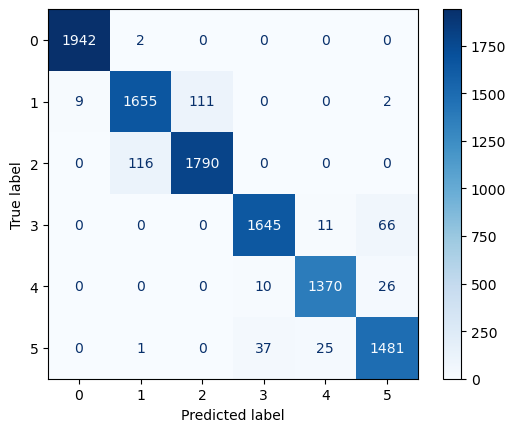

In [39]:
import joblib
import pandas as pd
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Step 1: Load dataset
df = pd.read_csv('data/UCI_preprocessed.csv')

# Step 2: Define features (X) and target (y)
X = df.drop(columns=['Activity'])
y = df['Activity']

# Step 3: Load the trained model and scaler
lr_model = joblib.load('best_logistic_regression_model.pkl')
scaler = joblib.load('scaler.pkl')

# Step 4: Scale the features
X_scaled = scaler.transform(X)

# Step 5: Perform cross-validation and get predicted values
y_pred = cross_val_predict(lr_model, X_scaled, y, cv=10)

# Step 6: Generate confusion matrix
cm = confusion_matrix(y, y_pred)

# Step 7: Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr_model.classes_)
disp.plot(cmap='Blues')
